# Classification of Gender with Body Mass Index using Machine Learning Algorithms :

### _The reported Height and weight-related behaviours and weight misperception were associated with depressive symptoms, and among girls, this relationship was becoming even stronger over the three decades examined in this study. The findings could possibly be part of the explanation for increases in adolescent depressive symptoms that have been observed in recent decades._

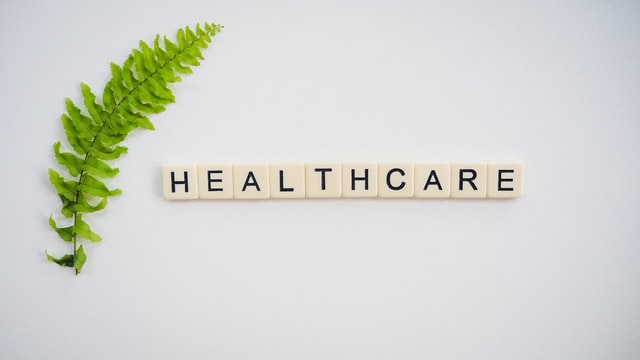

### _Children under two years of age can move up and down centiles as they do what is called catch-up or catch-down growth to reach their genetically determined growth centile.<br> Around 80% of height is down to genetics. To estimate a child's predicted final height, your doctor would take the mid-parental height. <br>For boys, that is the father's height in centimetres plus (the mother's height plus 14) divided by two, and for girls it is (the father's height minus 14) plus the mother's height divided by two. If a child's projected height lies within 5cm of this range and their rate of growth is normal, then they will be as tall as you would expect from their genetics._

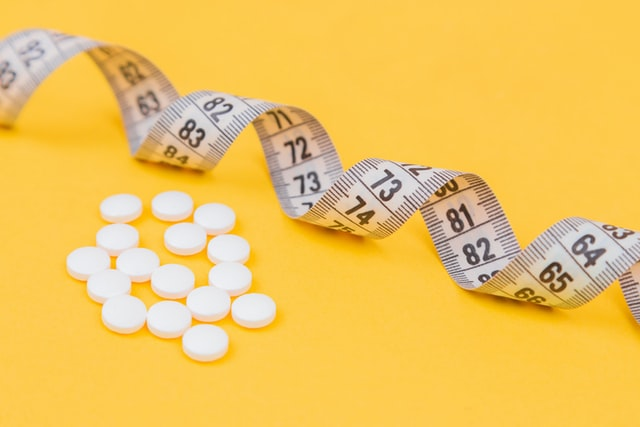

### _An increase in dieting among young people is concerning because experimental studies have found that dieting is generally ineffective in the long term at reducing body weight in adolescents, but can instead have greater impacts on mental health. We know, for instance, that dieting is a strong risk factor in the development of eating disorders._

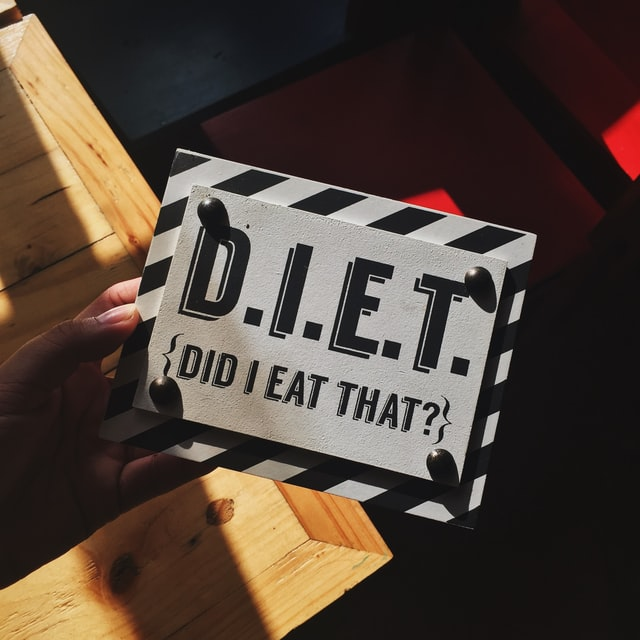

### _One reason diets don't work is because they can encourage people to think of foods as "good" or "bad," when the truth is everything is OK in moderation. Diets also encourage people to "give up" certain foods, which can make us feel more deprived. And not only do we feel deprived, diets often deplete our bodies of important nutrients. Teens should eat a variety of foods, and there's nothing wrong with the occasional treat. A candy bar somehow tastes more special if we treat ourselves once in a while instead of every day._

### _The best way to stay at a healthy weight (or lose weight if you need to) is to make healthy food choices daily. For some of us, that means changing our mindset about food. Instead of thinking of food emotionally (for example, as a reward for doing well on a test or as a way to deal with stress), see it for what it is — a practical way to fuel our bodies_

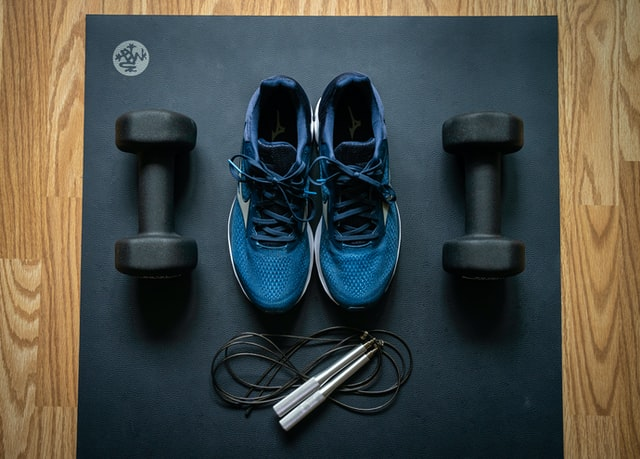

---
---

## _Importing Libraries_

In [1]:
import pandas as pd
import numpy as np

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## _Reading Dataset_

In [9]:
dfn = pd.read_csv('gender bmi data.csv')

In [16]:
dfn.head()

,Gender,Height,Weight,Height in cm,Weight in Kg,BMI
0,Male,73.847017,241.893563,187.57,108.85,30.94
1,Male,68.781904,162.310473,174.71,73.04,23.93
2,Male,74.110105,212.740856,188.24,95.73,27.02
3,Male,71.730978,220.042470,182.20,99.02,29.83
4,Male,69.881796,206.349801,177.50,92.86,29.47


In [11]:
df = dfn.drop(['Height', 'Weight'], axis = 1)

In [12]:
df.head()

,Gender,Height in cm,Weight in Kg,BMI
0,Male,187.57,108.85,30.94
1,Male,174.71,73.04,23.93
2,Male,188.24,95.73,27.02
3,Male,182.20,99.02,29.83
4,Male,177.50,92.86,29.47


## _Checking for null values :_

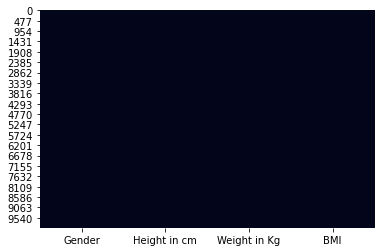

In [15]:
sns.heatmap(df.isnull(), cbar=False)

As it seems, no null values to take care of .

---

## _Exploratory data Analysis and Visualization_

In [17]:
df.shape

(10000, 4)

In [19]:
df.describe()

,Height in cm,Weight in Kg,BMI
count,10000.000000,10000.000000,10000.000000
mean,168.573573,72.648124,25.273705
std,9.772756,14.448780,2.672488
min,137.830000,29.120000,15.330000
25%,161.300000,61.120000,23.280000
50%,168.450000,72.545000,25.530000
75%,175.702500,84.222500,27.340000
max,200.660000,121.500000,32.770000


## _Using Correlation for drawing a Heatmap!_

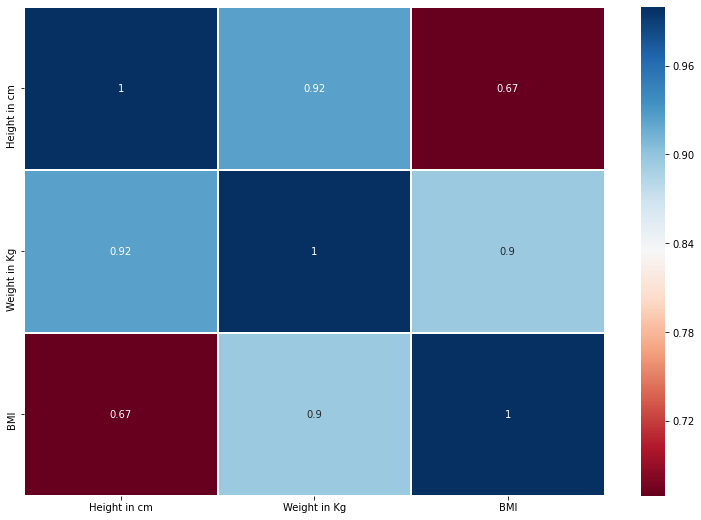

In [39]:
corrmat = df.corr()
corr_features = corrmat.index
plt.figure(figsize=(13,9))
g=sns.heatmap(df[corr_features].corr(),annot=True, linewidth =.9 , cmap="RdBu")

Text(0.5, 1.0, 'Number of male and female in this dataset ')

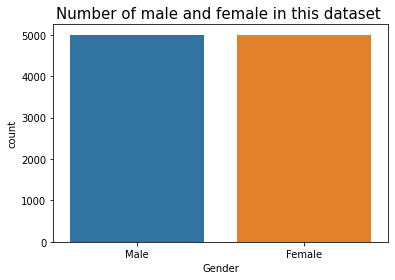

In [54]:
sns.countplot(df.Gender)
plt.title("Number of male and female in this dataset ", size =15)

Text(0.5, 1.0, 'Analyzing the BMI of the dataset')

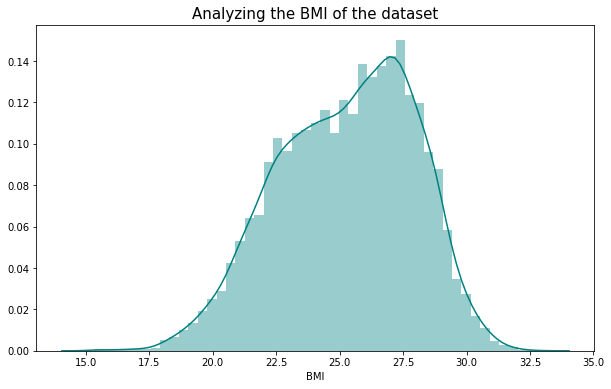

In [43]:
plt.figure(figsize=(10,6))
sns.distplot(df.BMI, color ="teal")
plt.title("Analyzing the BMI of the dataset", size =15)

[]

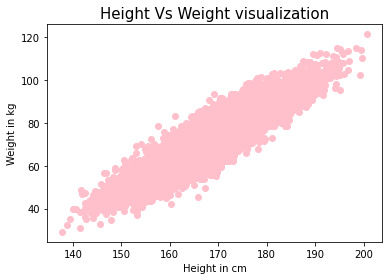

In [52]:
plt.scatter(x=df["Height in cm"], y=df["Weight in Kg"], color='pink')
plt.title("Height Vs Weight visualization", size = 15)
plt.xlabel("Height in cm")
plt.ylabel("Weight in kg")
plt.plot()

### _Plotting a pairplot for analysis wrt gender_

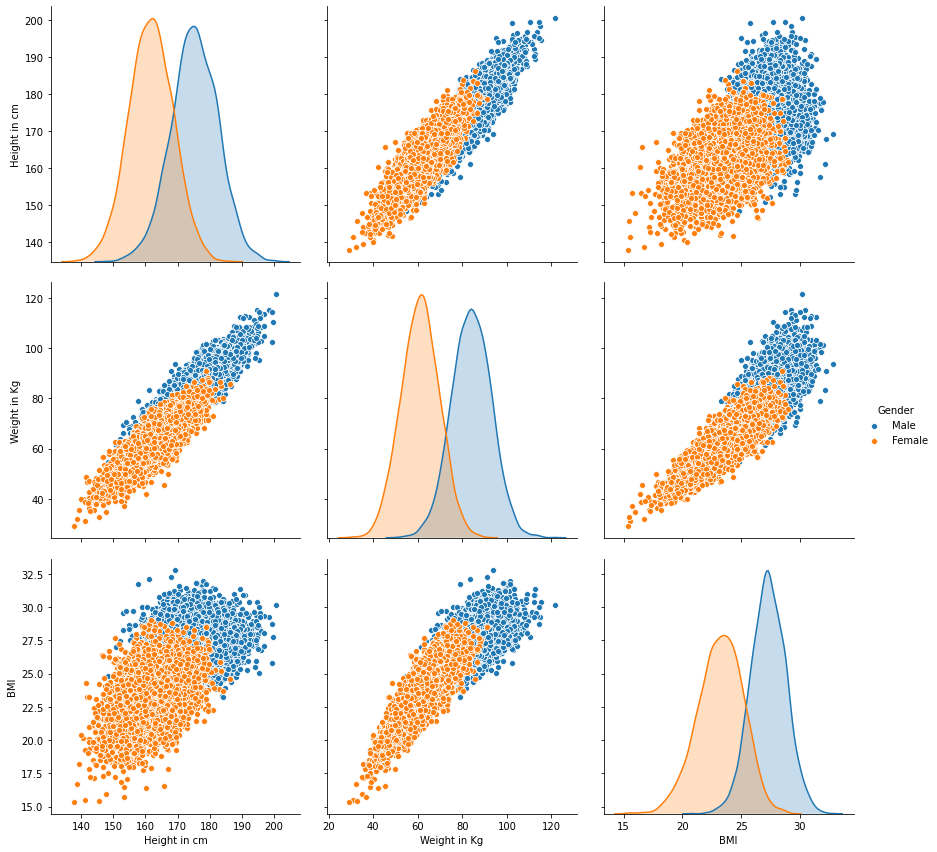

In [56]:
sns.pairplot(df, hue='Gender', height=4)

### _Looking for kde distribution :_

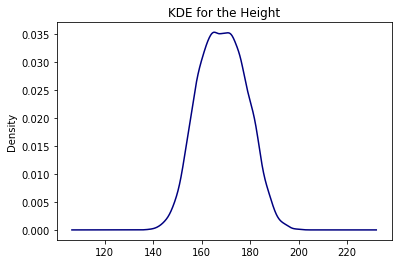

In [61]:
df['Height in cm'].plot(kind="kde", title='KDE for the Height', color='navy');

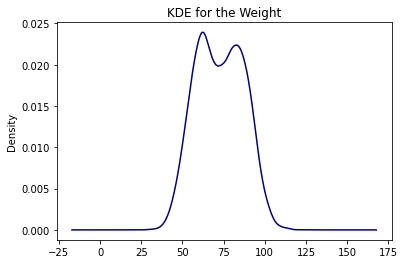

In [63]:
df['Weight in Kg'].plot(kind="kde", title='KDE for the Weight', color='navy');

---
## _Data Preprocessing_

In [64]:
df.head()

,Gender,Height in cm,Weight in Kg,BMI
0,Male,187.57,108.85,30.94
1,Male,174.71,73.04,23.93
2,Male,188.24,95.73,27.02
3,Male,182.20,99.02,29.83
4,Male,177.50,92.86,29.47


In [65]:
df = df.drop(['BMI'], axis = 1)

In [66]:
df.head()

,Gender,Height in cm,Weight in Kg
0,Male,187.57,108.85
1,Male,174.71,73.04
2,Male,188.24,95.73
3,Male,182.20,99.02
4,Male,177.50,92.86


## _Independent and dependent features :_

In [67]:
X = df.drop('Gender', axis = 1)

In [68]:
y = df['Gender']

In [71]:
y.head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: Gender, dtype: object

## _Using Label Encoder :_
As to make the y values from categorical to numeric.

In [72]:
from sklearn.preprocessing import LabelEncoder

In [73]:
encoder = LabelEncoder()

In [74]:
y = encoder.fit_transform(y)

In [75]:
y

array([1, 1, 1, ..., 0, 0, 0])

- _Now, Male is used for 1 and Female will be denoted by 0_

---

## _Train-test split_

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

---
---
# Making the Model 

# _Using Random Forest Classifier :_

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rfc= RandomForestClassifier(n_estimators=8)

In [81]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [103]:
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [82]:
from sklearn.metrics import accuracy_score
accuracy_rfc = accuracy_score(y_pred, y_test)

##### Accuracy of Random forest classifier :

In [83]:
accuracy_rfc

0.8976666666666666

##### Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data Using Cross Validation to check overfitting of the model


In [84]:
from sklearn.model_selection import cross_val_score
rscore=cross_val_score(rfc,X,y,cv=8)

In [85]:
rscore

array([0.8984, 0.8984, 0.9048, 0.888 , 0.904 , 0.8936, 0.9016, 0.8984])

In [87]:
rscore.mean()

0.8984

### _Confusion matrix for Random forest_

In [88]:
from sklearn.metrics import confusion_matrix

In [89]:
conf= confusion_matrix(y_test, y_pred)
conf

array([[1385,  137],
       [ 170, 1308]], dtype=int64)

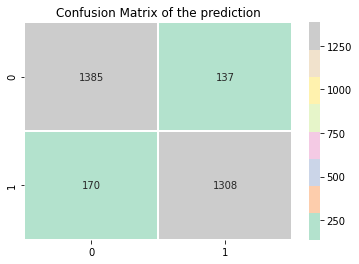

In [91]:
sns.heatmap(conf, annot=True, cmap="Pastel2", linewidths=.9, fmt='d')
plt.title('Confusion Matrix of the prediction')
plt.show()

### _Classification report for random forest_

In [92]:
from sklearn.metrics import classification_report

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1522
           1       0.91      0.88      0.89      1478

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000



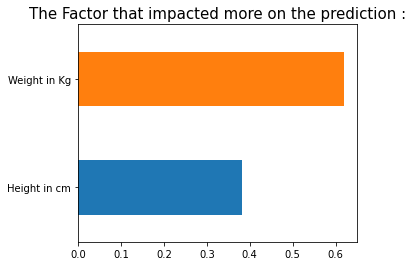

In [97]:
imp = rfc.feature_importances_
kfactors = pd.Series(imp,index=X.columns.values)
plt.figure(figsize=(5,4))
plt.title("The Factor that impacted more on the prediction :", size =15)
kfactors.sort_values().plot(kind = 'barh')

---
---
`Now,`
---
# _Using K Nearest Neighbors Classifier :_ 

In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
knn = KNeighborsClassifier(n_neighbors=3)

In [100]:
knn.fit(X_train, y_train)
y_predd = knn.predict(X_test)

In [101]:
y_predd

array([0, 1, 1, ..., 1, 0, 0])

##### Accuracy of KNN model :

In [105]:
accuracy_knn = accuracy_score(y_predd, y_test)
accuracy_knn

0.8946666666666667

#### _Using Cross validation :_

In [121]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,30):
 knn_classifier = KNeighborsClassifier(n_neighbors = k)
 score=cross_val_score(knn_classifier,X,y,cv=10)
 knn_scores.append(score.mean())

In [122]:
knn_scores

[0.8755,
 0.8768,
 0.8995,
 0.8995000000000001,
 0.9077,
 0.9082000000000001,
 0.9122000000000001,
 0.9123999999999999,
 0.9144,
 0.9138,
 0.9165999999999999,
 0.9158000000000002,
 0.917,
 0.9174000000000001,
 0.9179000000000002,
 0.9179,
 0.9183999999999999,
 0.9176000000000002,
 0.9182,
 0.9179,
 0.9180000000000001,
 0.9182,
 0.9183,
 0.9181000000000001,
 0.9187000000000001,
 0.9187000000000001,
 0.9185000000000001,
 0.9183,
 0.9188000000000001]

##### Now with improved number of neighbors :

In [137]:
knn_classifier = KNeighborsClassifier(n_neighbors = 27)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [138]:
score.mean()

0.9185000000000001

In [139]:
knn = KNeighborsClassifier(n_neighbors=27)

In [140]:
knn.fit(X_train, y_train)
y_predknn = knn.predict(X_test)

##### Improved Accuracy of KNN :

In [141]:
accuracy_new = accuracy_score(y_predknn, y_test)
accuracy_new

0.9156666666666666

### _Confusion matrix for KNN classifier :_

In [142]:
conf= confusion_matrix(y_test,y_predknn)
conf

array([[1404,  118],
       [ 135, 1343]], dtype=int64)

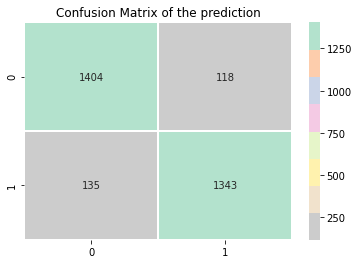

In [146]:
sns.heatmap(conf, annot=True, cmap="Pastel2_r", linewidths=.9, fmt='d')
plt.title('Confusion Matrix of the prediction')
plt.show()

### _Classification report for KNN Classifier :_

In [144]:
print(classification_report(y_test, y_predknn))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1522
           1       0.92      0.91      0.91      1478

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



---
# _Conclusion :_

### _I have done Analysis as well as visualization of the Dataset.<br>And I have Trained the model using:_
- ### Random Forest Classifier
- ### K Nearest Classifier

### _And From the above trained Models, It can be seen that_
### _the KNN model performed slightly better than the Random Forest Classifier._